<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton for Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [1]:
import pandas as pd
print(pd.__version__)

0.25.1


In [2]:
import numpy as np
print(np.__version__)

1.17.1


## Standard Case: explicit time stamp

* each entry belongs to one time stamp
* we just have a sequence of events

_let me know if your case looks different_

In [3]:
pd.read_csv?

In [4]:
# for local
url = 'opsd_germany_daily.csv'

# for colab
# url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

In [5]:
time_series_df.shape

(4383, 4)

In [6]:
time_series_df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
time_series_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
time_series_df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [9]:
time_series_df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [10]:
# just january 2017
time_series_df['2017-01']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [11]:
# exactly what you think it does
time_series_df['2017-01-01': '2017-01-05']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


In [12]:
# if you want to train just on January data
x = time_series_df['2017-01'].to_numpy()
x

array([[1130.413,  307.125,   35.291,  342.416],
       [1441.052,  295.099,   12.479,  307.578],
       [1529.99 ,  666.173,    9.351,  675.524],
       [1553.083,  686.578,   12.814,  699.392],
       [1547.238,  261.758,   20.797,  282.555],
       [1501.795,  115.723,   33.341,  149.064],
       [1405.145,  252.307,    8.387,  260.694],
       [1301.011,   41.261,    4.991,   46.252],
       [1604.348,  190.983,    7.07 ,  198.053],
       [1639.046,  280.373,   13.045,  293.418],
       [1654.809,  637.259,    7.379,  644.638],
       [1620.597,  584.792,   17.865,  602.657],
       [1608.895,  518.618,   14.311,  532.929],
       [1392.736,  487.189,   16.767,  503.956],
       [1289.904,  229.77 ,   16.105,  245.875],
       [1605.465,   69.209,   17.6  ,   86.809],
       [1649.104,   79.363,   22.909,  102.272],
       [1669.395,  148.915,   22.709,  171.624],
       [1667.477,  121.272,   38.191,  159.463],
       [1641.737,  109.383,   39.633,  149.016],
       [1423.02 ,   

In [13]:
time_series_df.plot?

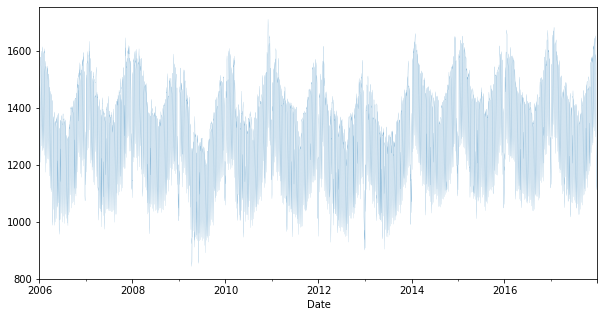

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
time_series_df['Consumption'].plot(linewidth=0.1)

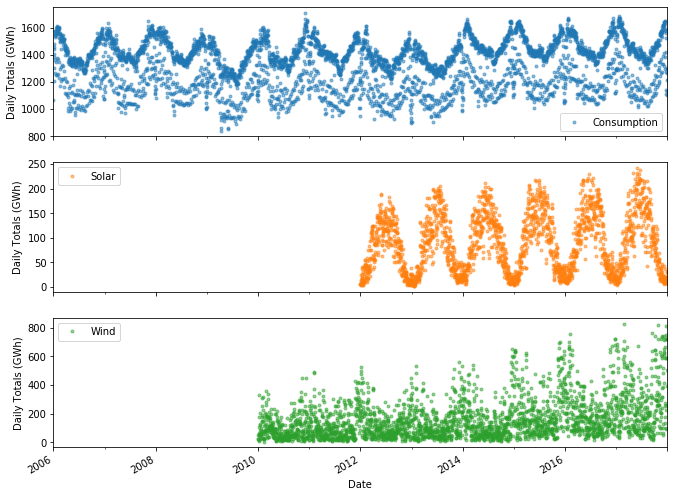

In [15]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [16]:
df_2017 = time_series_df['2017']
df_2017.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


Text(0, 0.5, 'Daily Consumption (GWh)')

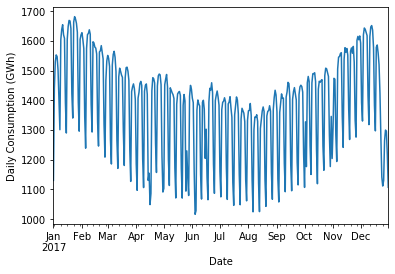

In [17]:
df_2017['Consumption'].plot()
plt.ylabel('Daily Consumption (GWh)')

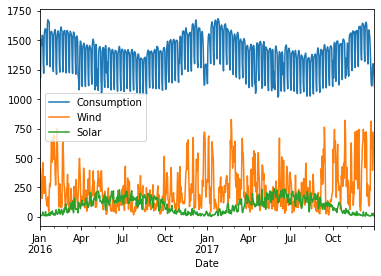

In [18]:
time_series_df['2016':'2017'][['Consumption', 'Wind', 'Solar']].plot()

Text(0, 0.5, 'Daily Consumption (GWh)')

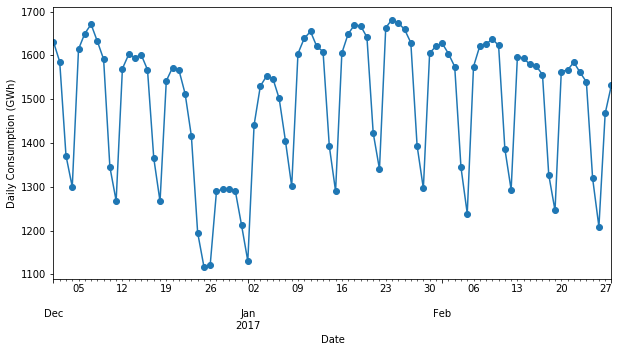

In [19]:
plt.figure(figsize=(10, 5))

time_series_df['2016-12':'2017-2']['Consumption'].plot(marker='o')
plt.ylabel('Daily Consumption (GWh)')

## Classic Models

In [20]:
y = time_series_df['2016-12': '2017-2']['Consumption'].to_numpy()

In [21]:
y.shape

(90,)

In [22]:
X = np.arange(len(y)).reshape(-1, 1)

In [23]:
X.shape

(90, 1)

In [24]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor(tol=None, max_iter=10000)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
est.score(X, y)

-0.7124222760173504

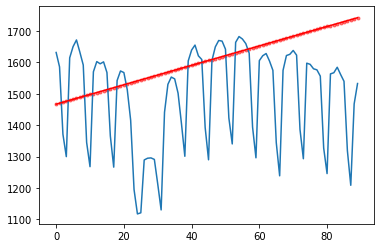

In [26]:
plt.plot(X, y)

# we can either plot using line parameters 
a = est.coef_; b = est.intercept_
lreg = a*X + b
plt.plot(X, lreg, c='red')

# or plot predicted points
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')



In [27]:
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html

from sklearn.svm import SVR

In [28]:
%%time

svr_lin = SVR(kernel='linear', C=1e4)
y_lin = svr_lin.fit(X, y).predict(X)

Wall time: 2 s


In [29]:
svr_lin.score(X, y)

-0.236278875385578

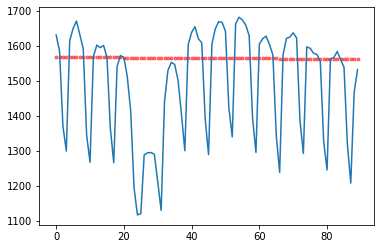

In [30]:
plt.plot(X, y)
plt.scatter(X, y_lin, marker='.', alpha=0.5, color='red')

In [76]:
%%time

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

Wall time: 24 ms


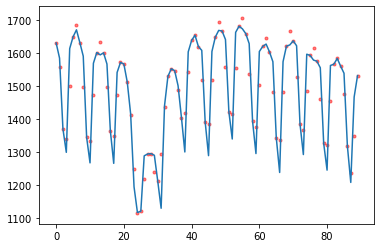

In [77]:
plt.plot(X, y)
plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

In [78]:
svr_rbf.score(X, y)

0.8688596891435212

In [79]:
# does not terminate within any reasonable amount of time
# %%time 

# svr_poly = SVR(kernel='poly', C=1e4, max_iter=1000)
# y_poly = svr_poly.fit(X, y).predict(X)

### Evaluation

In [80]:
y_test = time_series_df['2017-2': '2017-3']['Consumption'].to_numpy()
y_test.shape

(59,)

In [81]:
X_test = np.arange(len(y), len(y) + len(y_test)).reshape(-1, 1)
X_test.shape

(59, 1)

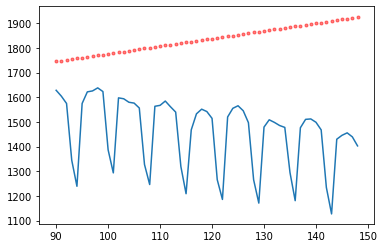

In [82]:
plt.plot(X_test, y_test)

y_test_pred = est.predict(X_test)
plt.scatter(X_test, y_test_pred, marker='.', alpha=0.5, color='red')

In [83]:
est.score(X_test, y_test)

-7.766841156572822

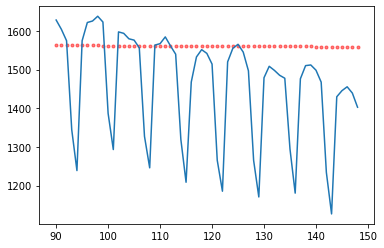

In [84]:
plt.plot(X_test, y_test)

y_lin = svr_lin.predict(X_test)

plt.scatter(X_test, y_lin, marker='.', alpha=0.5, color='red')

In [85]:
svr_lin.score(X_test, y_test)

-0.5385690425898566

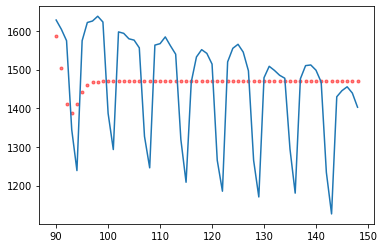

In [86]:
plt.plot(X_test, y_test)

y_rbf = svr_rbf.predict(X_test)

plt.scatter(X_test, y_rbf, marker='.', alpha=0.5, color='red')

In [87]:
svr_rbf.score(X_test, y_test)

0.03204329980888687